In [1]:
import melspectrogram_to_cam
import numpy as np
import tensorflow as tf
import librosa


In [2]:
# Generate a sample Mel spectrogram
y, sr = librosa.load(librosa.example('trumpet'))
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)



In [3]:
# Convert to decibel scale
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)


In [4]:
# Convert to tensor and add batch dimension
mel_spectrogram_tensor = tf.expand_dims(tf.convert_to_tensor(mel_spectrogram_db), -1)
mel_spectrogram_tensor = tf.repeat(mel_spectrogram_tensor, 3, axis=-1)
mel_spectrogram_tensor = tf.expand_dims(mel_spectrogram_tensor, 0)

In [5]:
# Call the convert function
overlayed_image = melspectrogram_to_cam.convert(mel_spectrogram_tensor)


/opt/anaconda3/envs/deep_learning_/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/deep_learning_/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Original CAM shape: (7, 7)
Resized CAM shape: (128, 230)
Mel spectrogram shape: (128, 230, 3)


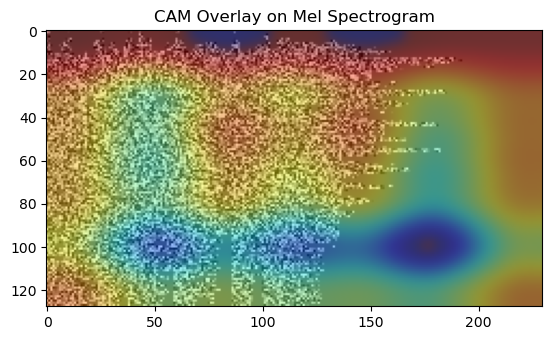

In [6]:
# Display or save the result
import matplotlib.pyplot as plt
plt.imshow(overlayed_image)
plt.title("CAM Overlay on Mel Spectrogram")
plt.show()